In [11]:
# Import SparkSession and create a Spark session to work with PySpark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("HYG Spark Lab").getOrCreate()

spark


In [13]:
## Display the current Spark session to confirm it is running
spark


In [16]:
# List all files in the GCS bucket to check that the HYG dataset is uploaded correctly
!gsutil ls gs://ruth-hyg-spark-bucket/


gs://ruth-hyg-spark-bucket/hygdata_v42.csv.gz


In [18]:
# Read the gzipped CSV file from your bucket
df = spark.read \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .csv("gs://ruth-hyg-spark-bucket/hygdata_v42.csv.gz")

# Show first 5 rows
df.show(5)


26/01/02 21:53:06 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+---+----+------+----+----+----+------+-------+----------+--------+------+-----+---+-----+------+-----+------+----------+--------+----------+-------+--------+--------+-----------------+--------------------+--------------+-------------+-----+----+----+----+------------+----+-------------------+----+-------+-------+
| id| hip|    hd|  hr|  gl|  bf|proper|     ra|       dec|    dist|  pmra|pmdec| rv|  mag|absmag|spect|    ci|         x|       y|         z|     vx|      vy|      vz|            rarad|              decrad|       pmrarad|     pmdecrad|bayer|flam| con|comp|comp_primary|base|                lum| var|var_min|var_max|
+---+----+------+----+----+----+------+-------+----------+--------+------+-----+---+-----+------+-----+------+----------+--------+----------+-------+--------+--------+-----------------+--------------------+--------------+-------------+-----+----+----+----+------------+----+-------------------+----+-------+-------+
|  0|NULL|  NULL|NULL|NULL|NULL|   Sol|    0.0|     

In [19]:
#Check the columns and types
df.printSchema()


root
 |-- id: integer (nullable = true)
 |-- hip: integer (nullable = true)
 |-- hd: integer (nullable = true)
 |-- hr: integer (nullable = true)
 |-- gl: string (nullable = true)
 |-- bf: string (nullable = true)
 |-- proper: string (nullable = true)
 |-- ra: double (nullable = true)
 |-- dec: double (nullable = true)
 |-- dist: double (nullable = true)
 |-- pmra: double (nullable = true)
 |-- pmdec: double (nullable = true)
 |-- rv: double (nullable = true)
 |-- mag: double (nullable = true)
 |-- absmag: double (nullable = true)
 |-- spect: string (nullable = true)
 |-- ci: double (nullable = true)
 |-- x: double (nullable = true)
 |-- y: double (nullable = true)
 |-- z: double (nullable = true)
 |-- vx: double (nullable = true)
 |-- vy: double (nullable = true)
 |-- vz: double (nullable = true)
 |-- rarad: double (nullable = true)
 |-- decrad: double (nullable = true)
 |-- pmrarad: double (nullable = true)
 |-- pmdecrad: double (nullable = true)
 |-- bayer: string (nullable = true)


In [20]:
#Quick statistics for numeric columns
df.describe().show()


+-------+-----------------+-----------------+------------------+------------------+-------+--------+----------+------------------+-------------------+------------------+-------------------+------------------+--------------------+------------------+------------------+-------+------------------+------------------+------------------+-------------------+--------------------+--------------------+--------------------+------------------+--------------------+--------------------+--------------------+-----+-----------------+------+-------------------+-----------------+-------+------------------+-----+-----------------+-----------------+
|summary|               id|              hip|                hd|                hr|     gl|      bf|    proper|                ra|                dec|              dist|               pmra|             pmdec|                  rv|               mag|            absmag|  spect|                ci|                 x|                 y|                  z|            

In [21]:
# Count rows
df.count()


119626

In [22]:
# Show stars with magnitude less than 5
df.filter(df.mag < 5).show(10)


+---+----+------+----+------+---------+---------+--------+----------+--------+------+-------+-----+-----+------+--------+------+----------+---------+-----------+---------+---------+---------+--------------------+--------------------+---------------+---------------+-----+----+----+----+------------+----+------------------+----+-------+-------+
| id| hip|    hd|  hr|    gl|       bf|   proper|      ra|       dec|    dist|  pmra|  pmdec|   rv|  mag|absmag|   spect|    ci|         x|        y|          z|       vx|       vy|       vz|               rarad|              decrad|        pmrarad|       pmdecrad|bayer|flam| con|comp|comp_primary|base|               lum| var|var_min|var_max|
+---+----+------+----+------+---------+---------+--------+----------+--------+------+-------+-----+-----+------+--------+------+----------+---------+-----------+---------+---------+---------+--------------------+--------------------+---------------+---------------+-----+----+----+----+------------+----+------

In [23]:
# Select id, ra, dec, mag columns
df.select("id", "ra", "dec", "mag").show(10)


+---+--------+----------+-----+
| id|      ra|       dec|  mag|
+---+--------+----------+-----+
|  0|     0.0|       0.0|-26.7|
|  1|  6.0E-5|  1.089009|  9.1|
|  2| 2.83E-4| -19.49884| 9.27|
|  3| 3.35E-4| 38.859279| 6.61|
|  4| 5.69E-4|-51.893546| 8.06|
|  5| 6.65E-4|-40.591202| 8.55|
|  6|0.001246|  3.946458|12.31|
|  7| 0.00147| 20.036114| 9.64|
|  8|0.001823| 25.886461| 9.05|
|  9|0.002355| 36.585958| 8.59|
+---+--------+----------+-----+
only showing top 10 rows



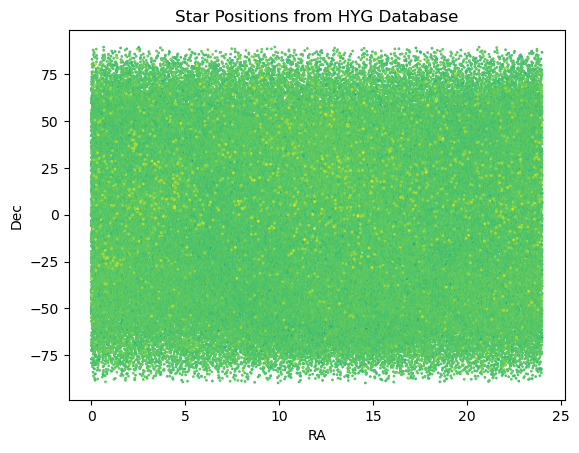

In [24]:
import matplotlib.pyplot as plt
pandas_df = df.select("ra", "dec", "mag").toPandas()
plt.scatter(pandas_df["ra"], pandas_df["dec"], s=1, c=pandas_df["mag"])
plt.xlabel("RA")
plt.ylabel("Dec")
plt.title("Star Positions from HYG Database")
plt.show()
